<h1 align="center">PROJECT:</h1>
<h2 style="display:block; margin-top:5px;" align="center">Classification of glial tumors using radiomic features and XAI models</h2>
___________________________________________________________________________________________________________________________
<h2 style="display:block; margin-top:5px;" align="center">BIOMEDICAL DATA SCIENCE</h2>   
<h3 style="display:block; margin-top:5px;" align="center">Universitat Politècnica de València</h3>
<h3 style="display:block; margin-top:5px;" align="center">Year 2023-2024</h3>
<br>
<h3 style="display:block; margin-top:5px;" align="center">EVA CANTÍN LARUMBE, MERES KURSATZ AND FRANCESCO PIO CAPOCCELLO</h3>

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [64]:
import random
random.seed(42)

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [65]:
X = pd.read_csv("X.csv", index_col=0)
y = pd.read_csv("y.csv", index_col=0)
X

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                               174.0                             650.0   
1                               427.0                             826.0   
2                               212.0                             697.0   
3                               429.9                             856.0   
4                               358.0                             649.0   
..                                ...                               ...   
354                            3754.0                            7206.9   
355                             648.0                            1422.0   
356                            2250.2                            5166.0   
357                            1652.0                            5113.0   
358                             267.0                             633.0   

     original_firstorder_Energy  original_firstorder_Entropy  \
0                  2.588828e+09                     4.300822   
1                  1.555094e+09                     4.670797   
2                  6.472778e+09                     4.796344   
3                  6.238777e+09                     4.777974   
4                  1.212578e+10                     4.199889   
..                          ...                          ...   
354                1.021032e+12                     7.652972   
355                2.668548e+10                     5.384028   
356                2.305284e+11                     7.453490   
357                6.660589e+11                     7.591514   
358                1.229713e+10                     4.406721   

     original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
0                                     324.0                      2.196185   
1                                     229.5                      2.685919   
2                                     283.0                      2.510939   
3                                     210.0                      4.546907   
4                                     143.0                      3.011379   
..                                      ...                           ...   
354                                  1937.0                      2.885087   
355                                   463.0                      3.096456   
356                                  1575.5                      2.531188   
357                                  2107.0                      2.602830   
358                                   182.0                      3.188866   

     original_firstorder_Maximum  original_firstorder_Mean  \
0                         1085.0                357.892864   
1                         1077.0                626.103994   
2                         1170.0                459.821288   
3                         1463.0                633.593407   
4                         1056.0                508.111091   
..                           ...                       ...   
354                      11777.0               5592.867096   
355                       2749.0                993.503008   
356                       7216.0               3680.912932   
357                       8575.0               3346.971976   
358                       1077.0                445.751146   

     original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median  \
0                                   169.490477                       256.0   
1                                   128.342289                       632.0   
2                                   154.048324                       457.0   
3                                   134.813886                       612.0   
4                                    88.454307                       511.0   
..                                         ...                         ...   
354                                1065.960253                      5670.0   
355                                 246.6

# 1. Data preparation and visualisation
We observe a clear imbalance in the data

In [60]:
y['diagnostic'].value_counts()

diagnostic
HGG    283
LGG     76
Name: count, dtype: int64

## 1.1 Oversampling in the train dataset

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

- Random Oversampling: Randomly duplicate examples in the minority class.
- Random Undersampling: Randomly delete examples in the majority class.
Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [30]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [31]:
X_over, y_over = oversample.fit_resample(X, y)

In [32]:
X_over.columns

Index(['original_firstorder_10Percentile', 'original_firstorder_90Percentile',
       'original_firstorder_Energy', 'original_firstorder_Entropy',
       'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
       'original_firstorder_Mean', 'original_firstorder_MeanAbsoluteDeviation',
       'original_firstorder_Median', 'original_firstorder_Minimum',
       'original_firstorder_Range',
       'original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness',
       'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity',
       'original_firstorder_Variance', 'original_glcm_Autocorrelation',
       'original_glcm_ClusterProminence', 'original_glcm_ClusterShade',
       'original_glcm_ClusterTendency', 'original_glcm_Contrast',
       'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
       'original_glcm_DifferenceEntropy', 'original_glcm_

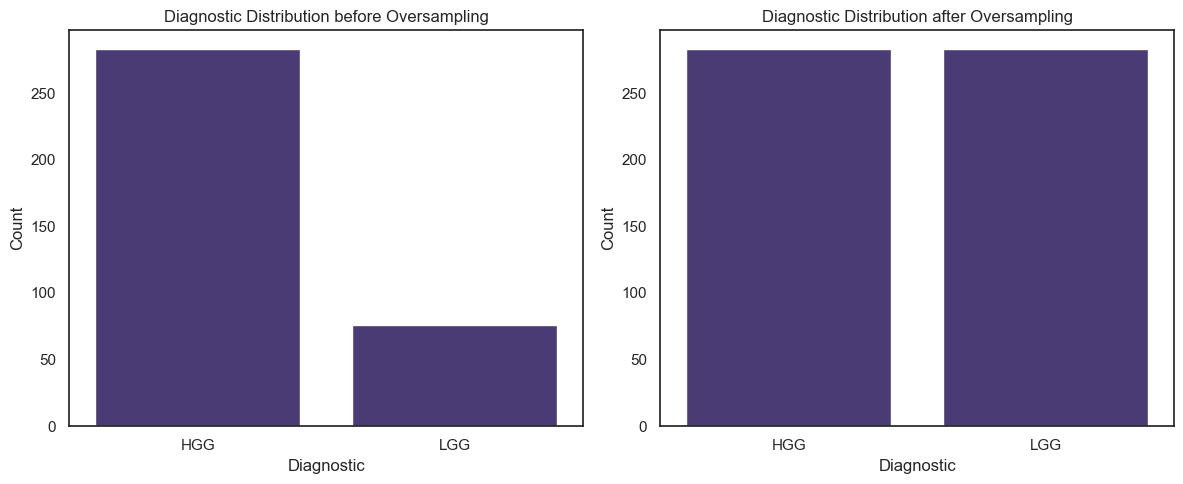

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to use Viridis color palette
sns.set_palette("viridis")

# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First count plot - before oversampling
sns.countplot(x="diagnostic", data=y, ax=axes[0])
axes[0].set_title("Diagnostic Distribution before Oversampling")
axes[0].set_xlabel("Diagnostic")
axes[0].set_ylabel("Count")

# Second count plot - after oversampling
sns.countplot(x="diagnostic", data=y_over, ax=axes[1])
axes[1].set_title("Diagnostic Distribution after Oversampling")
axes[1].set_xlabel("Diagnostic")
axes[1].set_ylabel("Count")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


## 1.2 Scale the data
As we can observe in the df, the data is in different units and magnitudes. It's essential to have it standarised.

In [68]:
X_cols = X_over.columns

In [69]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X_over)

In [70]:
X = pd.DataFrame(X, columns=X_cols)
X.head()

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                         -0.472843                         -0.354100   
1                         -0.211540                         -0.252279   
2                         -0.433596                         -0.326909   
3                         -0.208545                         -0.234923   
4                         -0.282804                         -0.354678   

   original_firstorder_Energy  original_firstorder_Entropy  \
0                   -0.249303                    -0.060334   
1                   -0.251068                     0.175305   
2                   -0.242671                     0.255267   
3                   -0.243071                     0.243567   
4                   -0.233018                    -0.124619   

   original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
0                               -0.061222                     -0.611542   
1                               -0.242525                     -0.468137   
2                               -0.139883                     -0.519375   
3                               -0.279937                      0.076799   
4                               -0.408479                     -0.372836   

   original_firstorder_Maximum  original_firstorder_Mean  \
0                    -0.371507                 -0.437230   
1                    -0.373998                 -0.232918   
2                    -0.345045                 -0.359585   
3                    -0.253829                 -0.227213   
4                    -0.380535                 -0.322800   

   original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median  ...  \
0                                  -0.116155                   -0.509069  ...   
1                                  -0.264656                   -0.215955  ...   
2                                  -0.171885                   -0.352378  ...   
3                                  -0.241300                   -0.231547  ...   
4                                  -0.408608                   -0.310282  ...   

   original_shape_Maximum2DDiameterColumn  \
0                               -0.723393   
1                               -1.722318   
2                               -0.546154   
3                                0.691702   
4                                0.095982   

   original_shape_Maximum2DDiameterRow  original_shape_Maximum2DDiameterSlice  \
0                            -0.972714                              -1.073565   
1                            -1.709300                              -1.624714   
2                            -0.630795                              -0.621542   
3                            -1.119580                              -0.148494   
4                            -0.080346                               0.103068   

   original_shape_Maximum3DDiameter  original_shape_MeshVolume  \
0                         -1.155858                  -0.791809   
1                         -1.753081                  -1.058361   
2                         -0.829293                  -0.552710   
3                         -0.021581                  -0.821803   
4                         -0.192321                  -0.147354   

   original_shape_MinorAxisLength  original_shape_Sphericity  \
0                       -0.737904                   1.360280   
1                       -1.564547                   0.802124   
2                       -0.146955                   1.006686   
3                       -0.963315                  -0.280408   
4                        0.328085                   0.030264   

   original_shape_SurfaceArea  original_shape_SurfaceVolumeRatio  \
0                   -0.875272                          -0.223523   
1                   -1.169133                           1.241136   
2                   -0.624823                          -0.437595   
3                   -0.747164                           0.486731   
4           

In [71]:
X.to_csv("X_scaled.csv", index=False)
y_over.to_csv("y_over.csv", index=False)

# 2. Correlation of variables

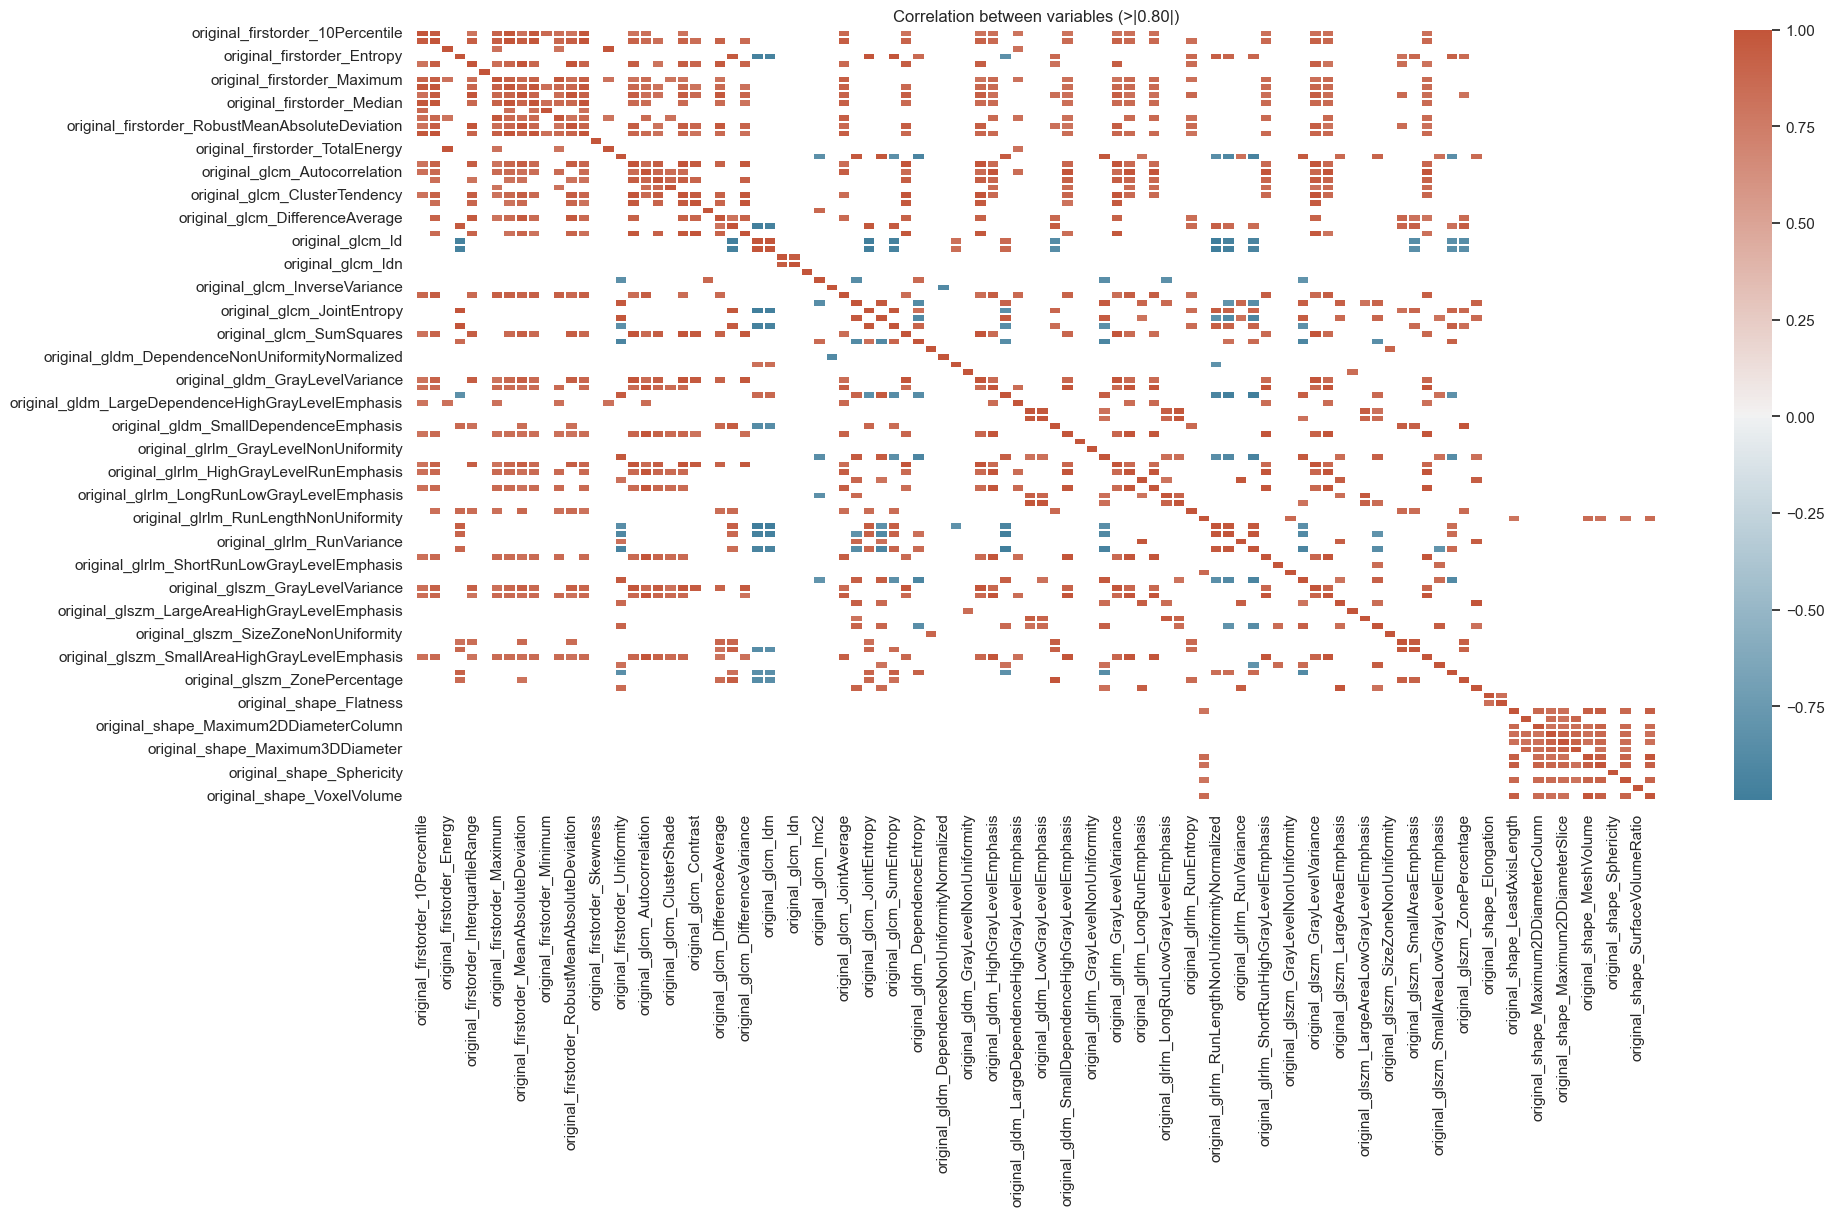

In [38]:
correlation = X.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
masked_corr_matrix = correlation[(correlation > 0.80) | (correlation < -0.80)]
plt.figure(figsize=(20, 10))
sns.heatmap(masked_corr_matrix, 
            cmap=cmap, 
            annot=False, 
            fmt='.2f', 
            linewidths=.05).set_title("Correlation between variables (>|0.80|)")
plt.show()

We can observe that several features are heavily correlated. In order to reduce overfitting in regard to those features we use the function below to determine highly correlated columns and delete them from the dataset.

In [66]:
def reduce_by_correlation(dataset, threshold):
    data = dataset.copy()
    correlated_cols = set() # Set of all the names of deleted columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in correlated_cols):
                col_name = corr_matrix.columns[i]
                correlated_cols.add(col_name)
                if col_name in data.columns:
                    del data[col_name]
                    
    return data, correlated_cols

We call the above defined function with a threashold of 0.95 to delete all columns that have have an absolute correlation value of above 0.95. We can see thar 43 columns were deleted in the process.

In [75]:
X, cols = reduce_by_correlation(X,0.95)
print(len(cols))
cols

43


{'original_firstorder_90Percentile',
 'original_firstorder_Mean',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Median',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_TotalEnergy',
 'original_glcm_ClusterTendency',
 'original_glcm_Contrast',
 'original_glcm_DifferenceAverage',
 'original_glcm_DifferenceEntropy',
 'original_glcm_DifferenceVariance',
 'original_glcm_Id',
 'original_glcm_Idn',
 'original_glcm_JointEnergy',
 'original_glcm_JointEntropy',
 'original_glcm_MaximumProbability',
 'original_glcm_SumEntropy',
 'original_glcm_SumSquares',
 'original_gldm_GrayLevelVariance',
 'original_gldm_HighGrayLevelEmphasis',
 'original_gldm_LargeDependenceEmphasis',
 'original_gldm_LowGrayLevelEmphasis',
 'original_gldm_SmallDependenceHighGrayLevelEmphasis',
 'original_glrlm_GrayLevelNonUniformityNormalized',
 'original_glrlm_GrayLevelVariance',
 'original_glrlm_HighGrayLeve

# 3. Features selection and reduction

## 3.0 Train and test split

In [14]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_over, test_size=0.20, random_state=11)
# line below necessary for using f1-score
#y_test1 = y_test1.replace('LGG',0).replace('HGG',1)
X_train1.head()

original_firstorder_10Percentile  original_firstorder_90Percentile  \
74                          -0.282478                         -0.354569   
243                          0.112560                         -0.086863   
214                         -0.621385                         -0.653431   
486                         -0.580081                         -0.665547   
442                         -0.293069                         -0.410533   

     original_firstorder_Energy  original_firstorder_Entropy  \
74                    -0.228913                    -0.062960   
243                   -0.106767                     0.034269   
214                   -0.238095                    -1.142627   
486                   -0.237261                    -1.907266   
442                   -0.236855                    -0.432390   

     original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
74                                -0.417493                      0.237616   
243                               -0.223851                     -0.594936   
214                               -0.557840                      0.173076   
486                               -0.627124                      0.192801   
442                               -0.447694                     -0.444400   

     original_firstorder_Maximum  original_firstorder_Mean  \
74                     -0.239216                 -0.331267   
243                    -0.207516                 -0.000060   
214                    -0.614770                 -0.654702   
486                    -0.640972                 -0.643782   
442                    -0.483440                 -0.362732   

     original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median  \
74                                   -0.390857                   -0.328016   
243                                  -0.288599                    0.019392   
214                                  -0.601020                   -0.661970   
486                                  -0.674540                   -0.643769   
442                                  -0.484098                   -0.346217   

     ...  original_shape_Maximum2DDiameterColumn  \
74   ...                               -0.308316   
243  ...                                0.685583   
214  ...                               -0.210254   
486  ...                                0.548092   
442  ...                               -1.462139   

     original_shape_Maximum2DDiameterRow  \
74                              0.892185   
243                             1.028601   
214                             0.288846   
486                             1.541745   
442                            -1.392913   

     original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
74                               -1.002627                          0.775898   
243                               0.965282                          0.841114   
214                               0.322433                          0.049830   
486                               0.757803                          1.260932   
442                              -1.455536                         -1.567394   

     original_shape_MeshVolume  original_shape_MinorAxisLength  \
74                   -0.665170                       -0.875799   
243                   0.828271                        0.857138   
214                  -0.150315                        0.028726   
486                   0.845654                        0.966294   
442                  -1.037960                       -1.270992   

     original_shape_Sphericity  original_shape_SurfaceArea  \
74                   -0.590782                   -0.501394   
243                  -0.754819                    0.993632   
214                  -0.503520                    0.036627   
486                  -0.153507                    0.732944   
442                   0.810288                   -1.145111   

     original_shape_SurfaceVolumeRa

## 3.1 PCA

In [15]:
from sklearn.decomposition import PCA
#we want to preserve the 95% of variability of data
pca = PCA(.95)
components = pca.fit_transform(X)
pca2 = pca.fit_transform(X)

In [16]:
import numpy as np
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)

VarPerc  cumVarPerc
0   41.236811   41.236811
1   18.959566   60.196377
2   13.818758   74.015135
3    5.774499   79.789635
4    3.062053   82.851688
5    2.507728   85.359415
6    2.251143   87.610559
7    2.019180   89.629739
8    1.565344   91.195082
9    1.319120   92.514202
10   1.134062   93.648264
11   0.850218   94.498483
12   0.776906   95.275389

The new X dataset will be:

In [17]:
principal_df = pd.DataFrame(data = pca2
             , columns = ["PCA"+str(i+1) for i in range(len(expVar))])

principal_df

PCA1       PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    -1.057249  -1.994403  2.913454  0.430217 -1.113965 -0.837754  0.395626   
1     0.026218  -2.789434  5.929989 -0.706350 -1.555858 -1.719843 -0.068525   
2    -0.180335  -2.474431  1.860509 -0.503444 -1.559034 -1.073670  0.656762   
3     0.293334  -2.607977  2.158360 -2.326563  2.369741  1.798873 -0.825465   
4    -1.050757  -2.108522 -0.276904 -0.466321 -0.245650 -0.202349  0.304679   
..         ...        ...       ...       ...       ...       ...       ...   
561  -4.617256   1.011019 -4.551720  3.066999  0.606800  1.523042 -0.048873   
562  -4.483939   1.589174 -7.359011  2.640303 -1.968224  1.575213  1.056684   
563  -0.901703  -1.257272 -6.366299 -0.604551 -1.270821  0.086003  0.694282   
564 -11.467969  12.286141  3.539528 -0.151898  0.752418 -0.370903  7.706237   
565  -9.640329   8.549215  1.067993  1.116650 -1.296467 -1.161764 -2.003609   

         PCA8      PCA9     PCA10     PCA11     PCA12     PCA13  
0   -0.198428 -0.920878 -0.604817  0.115853 -0.873874 -0.384614  
1   -1.984416 -1.119487 -0.392132  0.825146  0.499932  0.970617  
2   -0.687574 -0.793303 -0.246864  0.232549 -0.141804 -0.340300  
3   -0.058604 -0.032534  0.120477  0.094346 -1.490388 -0.706247  
4   -1.170698 -0.210616  1.076554  0.479428  0.114991 -0.289136  
..        ...       ...       ...       ...       ...       ...  
561 -1.360640  0.928753  0.297442 -0.371200  2.146620  2.151036  
562 -1.506183  0.224598 -1.034716  0.719492 -0.007914  1.517412  
563 -0.129803 -1.444871  0.229683  1.405504  0.103496 -0.227946  
564  3.680735  0.818232 -2.578661 -1.414844  1.416813 -0.518187  
565 -0.829865 -0.847376 -0.987856 -0.335561  0.020676  1.253205  

[566 rows x 13 columns]

<Figure size 640x480 with 0 Axes>

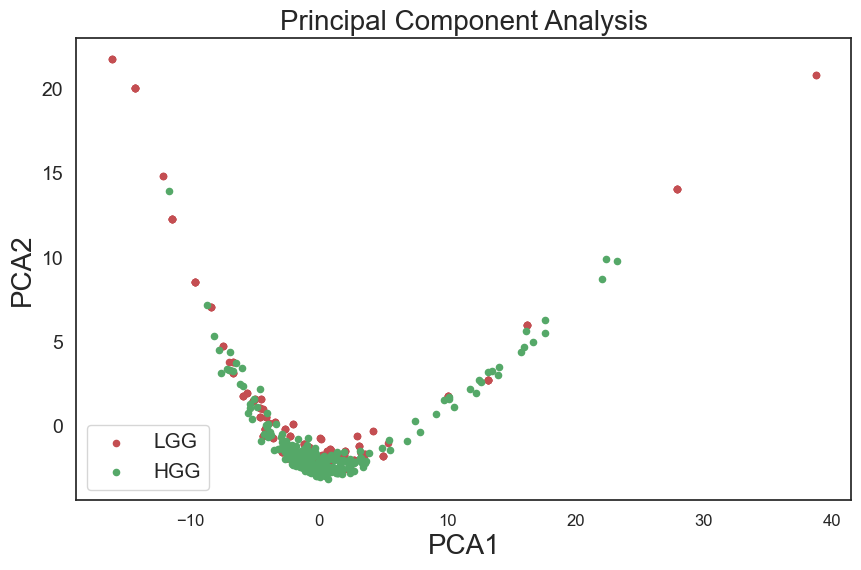

In [18]:
plt.figure()
plt.figure(figsize=(10,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PCA1',fontsize=20)
plt.ylabel('PCA2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = ['LGG', 'HGG']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y_over['diagnostic'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'PCA1']
               , principal_df.loc[indicesToKeep, 'PCA2'], c = color, s = 20)

plt.legend(targets,prop={'size': 15})

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(principal_df, y_over, test_size=0.20, random_state=11)

Looking at this plot, the principal components are not able to separate both populations: LGG and HGG. However, we will make some experiments using PCA as a feature reduction method.

## 3.2 Logistic Regression Feature Selection

In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
# create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(LogisticRegression(C=10,
max_iter=10000), k_features=8, 
                 forward=True, 
                 floating=False,
                 verbose=2,               
                 scoring='f1_macro',
                 cv=cv,
                 n_jobs=-1)
# fit the object to the training data
sfs = sfs.fit(X_train1, y_train1)
selected_features = X_train1.columns[list(sfs.k_feature_idx_)]
print(selected_features)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished

[2024-01-07 21:01:45] Features: 1/8 -- score: 0.768177583869722[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  84 out of  99 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    1.3s finished

[2024-01-07 21:01:46] Features: 2/8 -- score: 0.822746472893547[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    1.3s finished

[2024-01-07 21:01:47] Features: 3/8 -- score: 0.83149621416984[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Do

Index(['original_firstorder_Skewness', 'original_glcm_ClusterProminence',
       'original_glcm_Contrast', 'original_glcm_Idn',
       'original_shape_Maximum3DDiameter', 'original_shape_Sphericity',
       'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio'],
      dtype='object')


[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    1.8s finished

[2024-01-07 21:01:56] Features: 8/8 -- score: 0.8515307599785251

In [21]:
X_train3 = X_train1[selected_features]
X_test3 = X_test1[selected_features]

## 3.3 Correlation Feature Selection

In [22]:
y_trans = y_train1.replace('LGG',0).replace('HGG',1)
correlations = []
for col in X_train1.columns:
    correlations.append(X_train1[col].corr(y_trans.diagnostic))

print(np.array(sorted(correlations, key=abs))[-30:])

[-0.19121554 -0.19493785 -0.1962368  -0.19627669  0.19875606  0.20984074
 -0.21034801 -0.22908093 -0.23389976  0.23920571  0.24245098 -0.24473699
 -0.24498882 -0.25292861 -0.25641579  0.25856761 -0.2611578  -0.26297442
 -0.26527018 -0.2705439  -0.2755007  -0.28294741 -0.285987    0.29543082
  0.29570726  0.30507193  0.31673993  0.38105921 -0.43246313 -0.5091288 ]


In [23]:
best_features = []
for i in range(22):
    idx = np.argmax(np.absolute(correlations))
    correlations[idx] = 0    
    best_features.append(X_train1.columns[idx])
X_train4 = X_train1[best_features]
X_test4 = X_test1[best_features]
print(best_features)

['original_glcm_Idn', 'original_glcm_Idmn', 'original_glcm_Imc1', 'original_shape_SurfaceArea', 'original_shape_VoxelVolume', 'original_shape_MeshVolume', 'original_shape_Maximum2DDiameterRow', 'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'original_shape_Sphericity', 'original_firstorder_Kurtosis', 'original_glrlm_ShortRunEmphasis', 'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_GrayLevelNonUniformity', 'original_shape_MinorAxisLength', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_glrlm_RunPercentage', 'original_glcm_Idm', 'original_shape_Maximum2DDiameterSlice', 'original_glcm_Id', 'original_gldm_LargeDependenceEmphasis', 'original_glcm_DifferenceEntropy', 'original_shape_LeastAxisLength']


# 4. Explainable models 
https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models

In [23]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# helper function for evaluating a given classifier
def evaluate_classifier(y_test,pred):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.grid(False)
    plt.show()

In [24]:
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score,labels=['LGG','HGG'], average="binary", pos_label="HGG")
#scorer = make_scorer(accuracy_score)

## 4.1 Random Forest Classifier

### A. With no preprocessing

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [27]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [100, 200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth' : list(i for i in range(2,11)),
'criterion' :['gini', 'entropy']}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_rfc1.fit(X_train1, y_train1.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.9258853953775216


The optimal configuration is `n_estimators=100`, `max_features=log2`, `max_depth=7` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [28]:
rf1 = RandomForestClassifier(max_depth=7, random_state=42, criterion="entropy", max_features="log2", n_estimators=100)
rf1.fit(X_train1, y_train1.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       random_state=42)

In [29]:
#save the model to not run everything from scratch
dump(rf1, 'RF1.joblib')

['RF1.joblib']

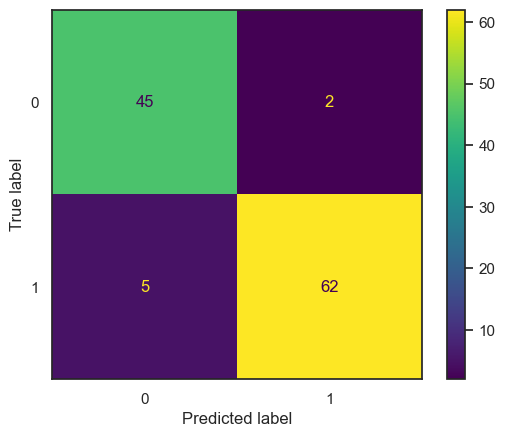

None
              precision    recall  f1-score   support

         HGG       0.90      0.96      0.93        47
         LGG       0.97      0.93      0.95        67

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [30]:
rf1 = load('RF1.joblib')
y_pred = rf1.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### B. Features selection with PCA

In [31]:

rf_clf = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [100, 200, 500], 'max_features': ['sqrt', 'log2'],
    'max_depth' : list(i for i in range(2,11)),'criterion' :['gini', 'entropy']}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_rfc1.fit(X_train2, y_train2.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.9339650076212085


The optimal configuration is `n_estimators=100`, `max_features=sqrt`, `max_depth=8` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [32]:
rf2 = RandomForestClassifier(max_depth=8, random_state=42, criterion="entropy", max_features="log2", n_estimators=100)
rf2.fit(X_train2, y_train2.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       random_state=42)

In [33]:
#save the model to not run everything from scratch 
dump(rf2, 'RF2.joblib')

['RF2.joblib']

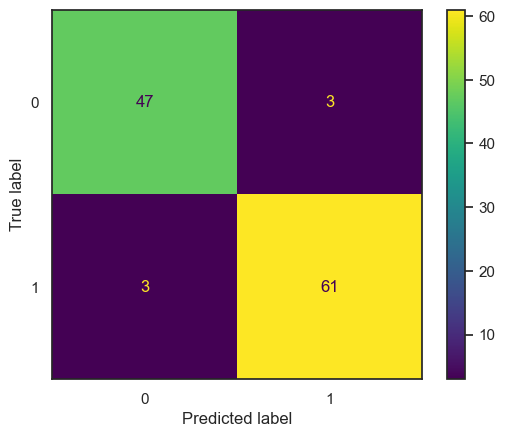

None
              precision    recall  f1-score   support

         HGG       0.94      0.94      0.94        50
         LGG       0.95      0.95      0.95        64

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [34]:
rf2 = load('RF2.joblib')
y_pred2 = rf2.predict(X_test2)
# Classification Report
print(evaluate_classifier(y_pred2, y_test1))
print(classification_report(y_pred2, y_test1))

### C. Features selection with Logistic Regression

In [35]:

rf_clf = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [100, 200, 500], 'max_features': ['sqrt', 'log2'], 
'max_depth' : list(i for i in range(2,11)),'criterion' :['gini', 'entropy']}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_rfc1.fit(X_train3, y_train1.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.9373668884307182


The optimal configuration is `n_estimators=100`, `max_features=sqrt`, `max_depth=8` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [36]:
rf3 = RandomForestClassifier(max_depth=8, random_state=42, criterion="entropy", max_features="sqrt", n_estimators=500)
rf3.fit(X_train3, y_train2.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

In [37]:
#save the model to not run everything from scratch 
dump(rf3, 'RF3.joblib')

['RF3.joblib']

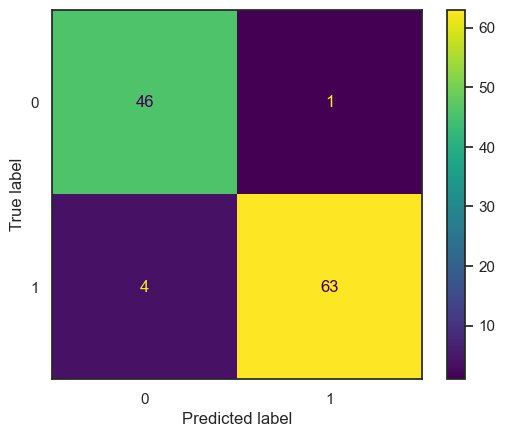

None
              precision    recall  f1-score   support

         HGG       0.92      0.98      0.95        47
         LGG       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [38]:
rf3 = load('RF3.joblib')
y_pred3 = rf3.predict(X_test3)
# Classification Report
print(evaluate_classifier(y_pred3, y_test1))
print(classification_report(y_pred3, y_test1))

### D. Features selection with Correlation

In [39]:

rf_clf = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [100, 200, 500], 'max_features': ['sqrt', 'log2'], 
'max_depth' : list(i for i in range(2,11)),'criterion' :['gini', 'entropy']}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_rfc1.fit(X_train3, y_train1.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.9373668884307182


The optimal configuration is `n_estimators=100`, `max_features=sqrt`, `max_depth=9` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [40]:
rf4 = RandomForestClassifier(max_depth=9, random_state=42, criterion="entropy", max_features="sqrt", n_estimators=100)
rf4.fit(X_train4, y_train2.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=9, random_state=42)

In [41]:
#save the model to not run everything from scratch 
dump(rf4, 'RF4.joblib')

['RF4.joblib']

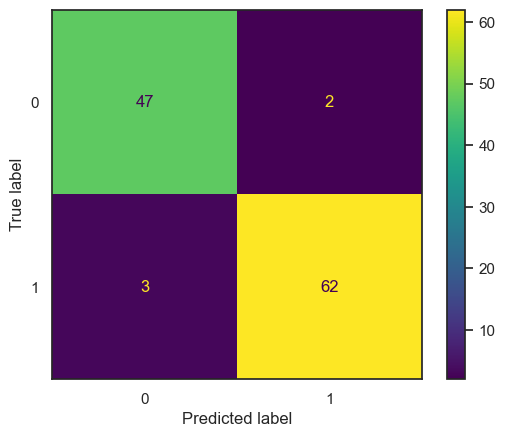

None
              precision    recall  f1-score   support

         HGG       0.94      0.96      0.95        49
         LGG       0.97      0.95      0.96        65

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [42]:
rf4 = load('RF4.joblib')
y_pred4 = rf4.predict(X_test4)
# Classification Report
print(evaluate_classifier(y_pred4, y_test1))
print(classification_report(y_pred4, y_test1))

## 3.2 Logistic Regression Classifier

### A. With no preprocessing

In [43]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression(random_state=42)

param_grid = { 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [1,5,10,20,25,30,35], 'multi_class': ['auto', 'ovr', 'multinomial']}

CV_lrc1 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_lrc1.fit(X_train1, y_train1.diagnostic)
print("Best Parameters:", CV_lrc1.best_params_)
print("Best Score:", CV_lrc1.best_score_)

Best Parameters: {'C': 30, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
Best Score: 0.9129395858146729


The optimal configuration is `C: 30`, `multi_class: multinomial`, `solver: newton-cg`. We train the model again and we save it to not build it from scratch.

In [44]:
lr1 = LogisticRegression(C=30, multi_class='multinomial', solver='newton-cg', random_state=42)
lr1.fit(X_train1, y_train1.diagnostic)

LogisticRegression(C=30, multi_class='multinomial', random_state=42,
                   solver='newton-cg')

In [45]:
#save the model to not run everything from scratch
dump(lr1, 'LR1.joblib')

['LR1.joblib']

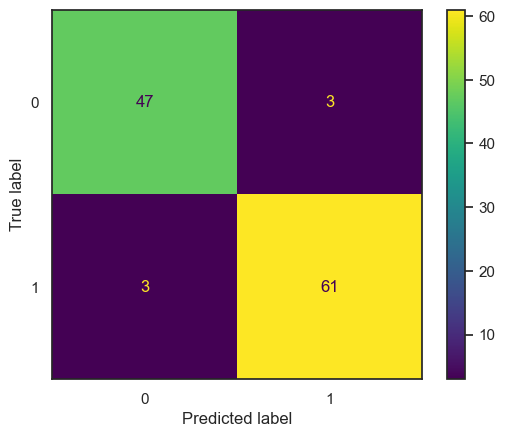

None
              precision    recall  f1-score   support

         HGG       0.94      0.94      0.94        50
         LGG       0.95      0.95      0.95        64

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [46]:
lr1 = load('LR1.joblib')
y_pred = lr1.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### B. Features selection with PCA

In [47]:
lr_clf = LogisticRegression(random_state=42)

param_grid = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.1,0.5,1], 'multi_class': ['auto', 'ovr', 'multinomial']}
    
CV_lrc2 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_lrc2.fit(X_train2, y_train1.diagnostic)
print("Best Parameters:", CV_lrc2.best_params_)
print("Best Score:", CV_lrc2.best_score_)

Best Parameters: {'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best Score: 0.8326886082575411


The optimal configuration is `C: 0.5`, `multi_class: auto`, `solver: saga`. We train the model again and we save it to not build it from scratch.

In [48]:
lr2 =  LogisticRegression(C=0.5, multi_class='auto', solver='saga', random_state=42)
lr2.fit(X_train2, y_train1.diagnostic)

LogisticRegression(C=0.5, random_state=42, solver='saga')

In [49]:
#save the model to not run everything from scratch
dump(lr2, 'LR2.joblib')

['LR2.joblib']

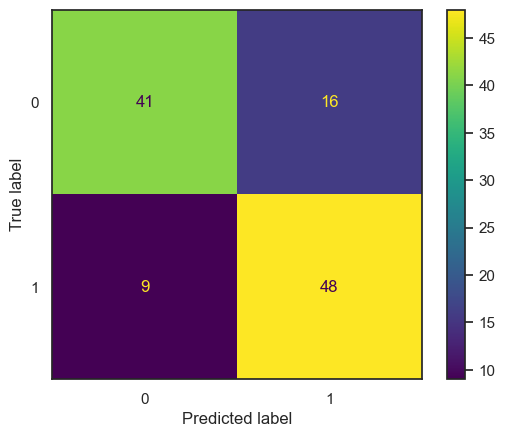

None
              precision    recall  f1-score   support

         HGG       0.82      0.72      0.77        57
         LGG       0.75      0.84      0.79        57

    accuracy                           0.78       114
   macro avg       0.78      0.78      0.78       114
weighted avg       0.78      0.78      0.78       114



In [50]:
lr2 = load('LR2.joblib')
y_pred = lr2.predict(X_test2)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### C. Features selection with Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression(random_state=42)

param_grid = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [1,5,10,20,25], 'multi_class': ['auto', 'ovr', 'multinomial']}

CV_lrc3 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_lrc3.fit(X_train3, y_train1.diagnostic)
print("Best Parameters:", CV_lrc3.best_params_)
print("Best Score:", CV_lrc3.best_score_)

Best Parameters: {'C': 5, 'multi_class': 'auto', 'solver': 'lbfgs'}
Best Score: 0.8579257283275137


The optimal configuration is `C: 20`, `multi_class: multinomial`, `solver: lbfgs`. We train the model again and we save it to not build it from scratch.

In [52]:
lr3 =  LogisticRegression(C=20, multi_class='multinomial', solver='lbfgs', random_state=42)
lr3.fit(X_train3, y_train1.diagnostic)

LogisticRegression(C=20, multi_class='multinomial', random_state=42)

In [53]:
#save the model to not run everything from scratch
dump(lr3, 'LR3.joblib')

['LR3.joblib']

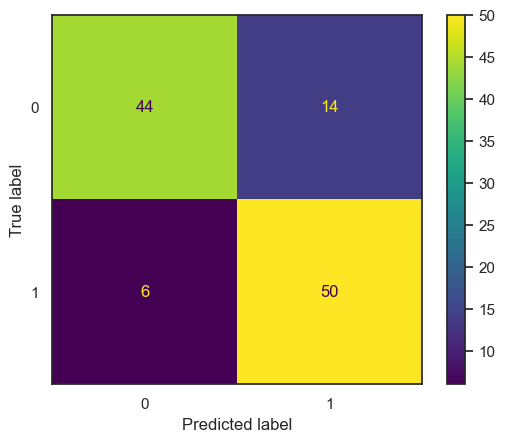

None
              precision    recall  f1-score   support

         HGG       0.88      0.76      0.81        58
         LGG       0.78      0.89      0.83        56

    accuracy                           0.82       114
   macro avg       0.83      0.83      0.82       114
weighted avg       0.83      0.82      0.82       114



In [54]:
lr3 = load('LR3.joblib')
y_pred = lr3.predict(X_test3)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### D. Features selection with Correlation

In [55]:
lr_clf = LogisticRegression(random_state=42)

param_grid = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'C': [1,10,30,50,100,130,140],
'multi_class': ['auto', 'ovr', 'multinomial']}

CV_lrc4 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_lrc4.fit(X_train4, y_train1.diagnostic)
print("Best Parameters:", CV_lrc4.best_params_)
print("Best Score:", CV_lrc4.best_score_)

Best Parameters: {'C': 30, 'multi_class': 'auto', 'solver': 'lbfgs'}
Best Score: 0.8586425197139039


The optimal configuration is `C: 130`, `multi_class: multinomial`, `solver: lbfgs`. We train the model again and we save it to not build it from scratch.

In [56]:
lr4 =  LogisticRegression(C=130, multi_class='multinomial', solver='lbfgs', random_state=42)
lr4.fit(X_train4, y_train1.diagnostic)

LogisticRegression(C=130, multi_class='multinomial', random_state=42)

In [57]:
#save the model to not run everything from scratch
dump(lr4, 'LR4.joblib')

['LR4.joblib']

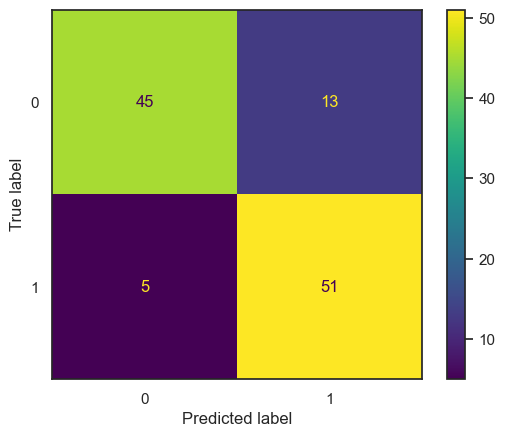

None
              precision    recall  f1-score   support

         HGG       0.90      0.78      0.83        58
         LGG       0.80      0.91      0.85        56

    accuracy                           0.84       114
   macro avg       0.85      0.84      0.84       114
weighted avg       0.85      0.84      0.84       114



In [58]:
lr4 = load('LR4.joblib')
y_pred = lr4.predict(X_test4)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

## 3.3 Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

### A. With no preprocessing

In [60]:
from sklearn.model_selection import GridSearchCV

dt1_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {'max_depth': list(range(2, 11)), 'criterion': ['gini', 'entropy'],
    'min_samples_split': [5, 10, 20],  'min_samples_leaf': [2, 5, 10],  'max_features': ['sqrt', 'log2']}

CV_dt_clf = GridSearchCV(estimator=dt1_clf, param_grid=param_grid, cv=cv, scoring=scorer)

CV_dt_clf.fit(X_train1, y_train1.diagnostic)

print("Best Parameters:", CV_dt_clf.best_params_)
print("Best Score:", CV_dt_clf.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 0.9175908491526279


In [61]:
# Create a Decision Tree classifier with the best parameters
dt1_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=20,
    random_state=42
)

# Fit the model to the training data
dt1_clf.fit(X_train1, y_train1.diagnostic)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=20,
                       random_state=42)

In [62]:
dump(dt1_clf, 'DT1.joblib')

['DT1.joblib']

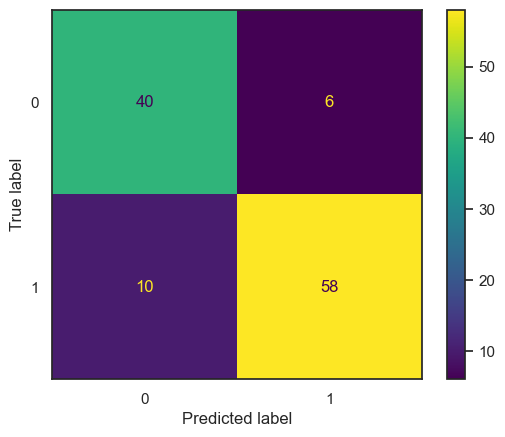

None
              precision    recall  f1-score   support

         HGG       0.80      0.87      0.83        46
         LGG       0.91      0.85      0.88        68

    accuracy                           0.86       114
   macro avg       0.85      0.86      0.86       114
weighted avg       0.86      0.86      0.86       114



In [63]:
dt1 = load('DT1.joblib')
y_pred_dt = dt1.predict(X_test1)

print(evaluate_classifier(y_pred_dt, y_test1))
print(classification_report(y_pred_dt, y_test1))

In [64]:
f1_score(y_test1,y_pred_dt, average="binary", pos_label="HGG")

0.8333333333333333

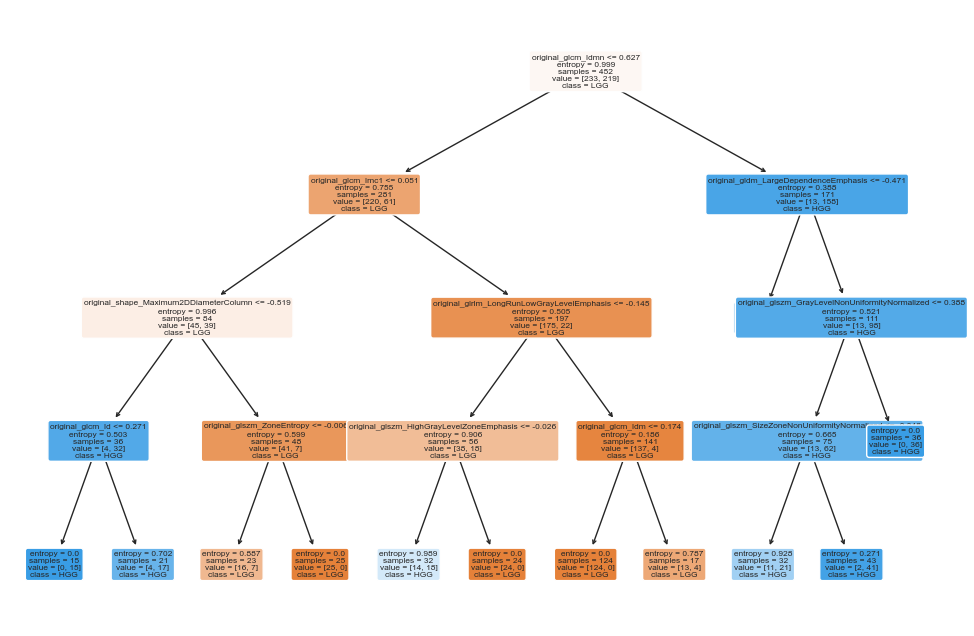

In [65]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt1_clf, filled=True, feature_names=X_train1.columns, class_names=['LGG', 'HGG'], rounded=True, fontsize=6)
plt.show()

In [66]:
from sklearn.tree import export_text

# Extract the trained decision tree
tree_model_dt1 = dt1_clf

# Visualize the rules of the tree
tree_rules_dt1 = export_text(tree_model_dt1, feature_names=list(X_train1.columns))
print("Rules of Decision Tree (dt1_clf):\n", tree_rules_dt1)


Rules of Decision Tree (dt1_clf):
 |--- original_glcm_Idmn <= 0.63
|   |--- original_glcm_Imc1 <= 0.05
|   |   |--- original_shape_Maximum2DDiameterColumn <= -0.52
|   |   |   |--- original_glcm_Id <= 0.27
|   |   |   |   |--- class: LGG
|   |   |   |--- original_glcm_Id >  0.27
|   |   |   |   |--- class: LGG
|   |   |--- original_shape_Maximum2DDiameterColumn >  -0.52
|   |   |   |--- original_glszm_ZoneEntropy <= -0.01
|   |   |   |   |--- class: HGG
|   |   |   |--- original_glszm_ZoneEntropy >  -0.01
|   |   |   |   |--- class: HGG
|   |--- original_glcm_Imc1 >  0.05
|   |   |--- original_glrlm_LongRunLowGrayLevelEmphasis <= -0.15
|   |   |   |--- original_glszm_HighGrayLevelZoneEmphasis <= -0.03
|   |   |   |   |--- class: LGG
|   |   |   |--- original_glszm_HighGrayLevelZoneEmphasis >  -0.03
|   |   |   |   |--- class: HGG
|   |   |--- original_glrlm_LongRunLowGrayLevelEmphasis >  -0.15
|   |   |   |--- original_glcm_Idm <= 0.17
|   |   |   |   |--- class: HGG
|   |   |   |--- o

### B. Features selection with PCA

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree classifier
dt2_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid_dt = {'max_depth': list(range(2, 11)), 'criterion': ['gini', 'entropy'],
    'min_samples_split': [5, 10, 20], 'min_samples_leaf': [2, 5, 10], 'max_features': ['sqrt', 'log2']}

# Create GridSearchCV object
CV_dt2_clf = GridSearchCV(estimator=dt2_clf, param_grid=param_grid_dt, cv=cv, scoring=scorer)

# Fit the model to the training data
CV_dt2_clf.fit(X_train2, y_train2.diagnostic)

# Print the best parameters and best score
print("Best Parameters:", CV_dt2_clf.best_params_)
print("Best Score:", CV_dt2_clf.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 0.8673198376039304


In [68]:
dt2_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=9,
    max_features='sqrt',
    min_samples_leaf=10,
    min_samples_split=5,
    random_state=42
)

dt2_clf.fit(X_train2, y_train2.diagnostic)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=5,
                       random_state=42)

In [69]:
dump(dt2_clf, 'DT2.joblib')

['DT2.joblib']

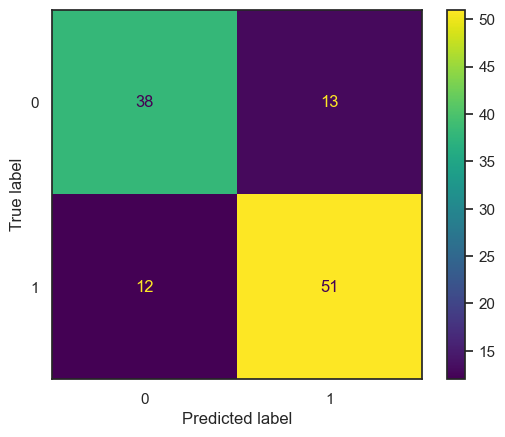

None
              precision    recall  f1-score   support

         HGG       0.76      0.75      0.75        51
         LGG       0.80      0.81      0.80        63

    accuracy                           0.78       114
   macro avg       0.78      0.78      0.78       114
weighted avg       0.78      0.78      0.78       114



In [70]:
dt2_clf = load('DT2.joblib')
y_pred_dt2 = dt2_clf.predict(X_test2)

print(evaluate_classifier(y_pred_dt2, y_test2))
print(classification_report(y_pred_dt2, y_test2))

In [71]:
f1_score(y_test2,y_pred_dt2, average="binary", pos_label="HGG")

0.7524752475247525

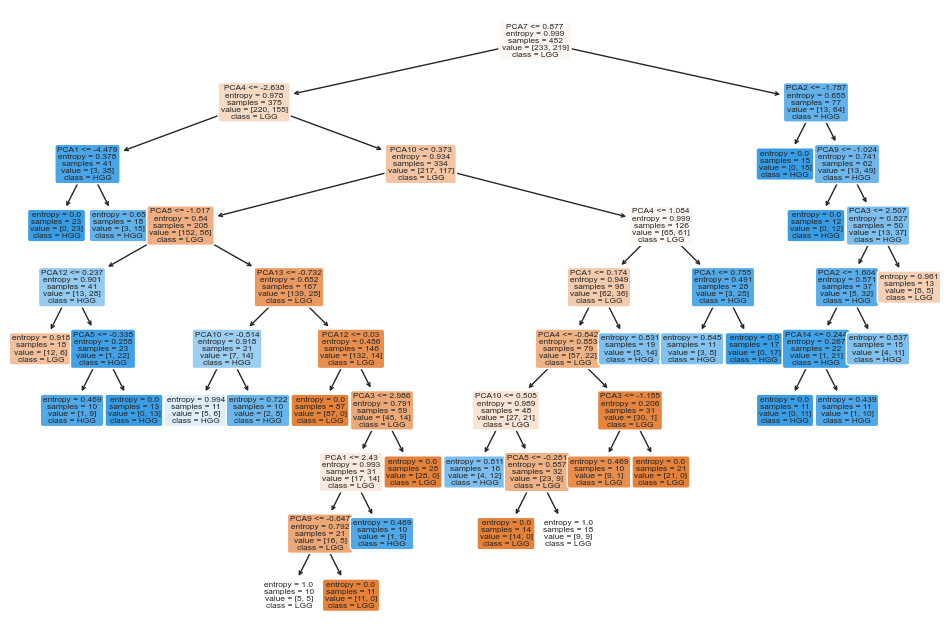

In [72]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt2_clf, filled=True, feature_names=X_train2.columns, class_names=['LGG', 'HGG'], rounded=True, fontsize=6)
plt.show()

In [73]:
from sklearn.tree import export_text

tree_model_dt2 = dt2_clf

tree_rules_dt2 = export_text(tree_model_dt2, feature_names=list(X_train2.columns))
print("Rules of Decision Tree (dt2_clf):\n", tree_rules_dt2)


Rules of Decision Tree (dt2_clf):
 |--- PCA7 <= 0.88
|   |--- PCA4 <= -2.64
|   |   |--- PCA1 <= -4.48
|   |   |   |--- class: LGG
|   |   |--- PCA1 >  -4.48
|   |   |   |--- class: LGG
|   |--- PCA4 >  -2.64
|   |   |--- PCA10 <= 0.37
|   |   |   |--- PCA8 <= -1.02
|   |   |   |   |--- PCA12 <= 0.24
|   |   |   |   |   |--- class: HGG
|   |   |   |   |--- PCA12 >  0.24
|   |   |   |   |   |--- PCA5 <= -0.34
|   |   |   |   |   |   |--- class: LGG
|   |   |   |   |   |--- PCA5 >  -0.34
|   |   |   |   |   |   |--- class: LGG
|   |   |   |--- PCA8 >  -1.02
|   |   |   |   |--- PCA13 <= -0.73
|   |   |   |   |   |--- PCA10 <= -0.51
|   |   |   |   |   |   |--- class: LGG
|   |   |   |   |   |--- PCA10 >  -0.51
|   |   |   |   |   |   |--- class: LGG
|   |   |   |   |--- PCA13 >  -0.73
|   |   |   |   |   |--- PCA12 <= 0.03
|   |   |   |   |   |   |--- class: HGG
|   |   |   |   |   |--- PCA12 >  0.03
|   |   |   |   |   |   |--- PCA3 <= 2.99
|   |   |   |   |   |   |   |--- PCA1 <= 2.43


### C. Feature Selection Logistic Regression

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the Decision Tree classifier
dt3_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid_dt = {'max_depth': list(range(2, 11)), 'criterion': ['gini', 'entropy'],
    'min_samples_split': [5, 10, 20], 'min_samples_leaf': [2, 5, 10],'max_features': ['sqrt', 'log2']}

# Create the GridSearchCV object
CV_dt3_clf = GridSearchCV(estimator=dt3_clf, param_grid=param_grid_dt, cv=cv, scoring=scorer)

# Fit the model
CV_dt3_clf.fit(X_train3, y_train1.diagnostic)

# Print the best parameters and score
print("Best Parameters:", CV_dt3_clf.best_params_)
print("Best Score:", CV_dt3_clf.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 0.8895658898476887


In [75]:
dt3_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=9,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

dt3_clf.fit(X_train3, y_train2.diagnostic)

DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [76]:
dump(dt3_clf, 'DT3.joblib')

['DT3.joblib']

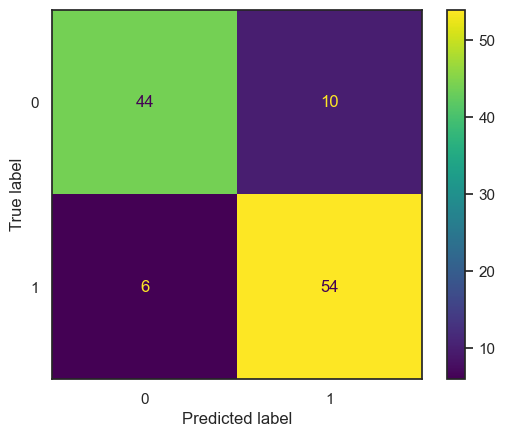

None
              precision    recall  f1-score   support

         HGG       0.88      0.81      0.85        54
         LGG       0.84      0.90      0.87        60

    accuracy                           0.86       114
   macro avg       0.86      0.86      0.86       114
weighted avg       0.86      0.86      0.86       114



In [77]:
dt3_clf = load('DT3.joblib')
y_pred3 = dt3_clf.predict(X_test3)

print(evaluate_classifier(y_pred3, y_test1))
print(classification_report(y_pred3, y_test1))

In [78]:
f1_score(y_test1,y_pred3, average="binary", pos_label="HGG")

0.8461538461538461

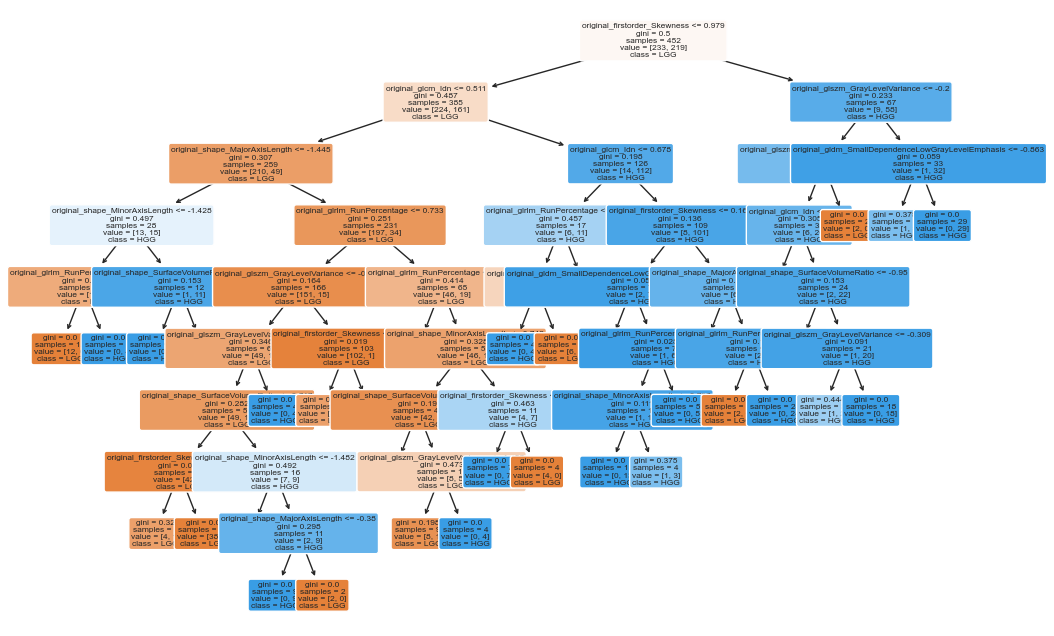

In [79]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt3_clf, filled=True, feature_names=X_train3.columns, class_names=['LGG', 'HGG'], rounded=True, fontsize=6)
plt.show()

In [80]:
from sklearn.tree import export_text
tree_model_dt3 = dt3_clf

tree_rules_dt3 = export_text(tree_model_dt3, feature_names=list(X_train3.columns))
print("Rules of Decision Tree (dt3_clf):\n", tree_rules_dt3)

Rules of Decision Tree (dt3_clf):
 |--- original_firstorder_Skewness <= 0.98
|   |--- original_glcm_Idn <= 0.51
|   |   |--- original_shape_MajorAxisLength <= -1.44
|   |   |   |--- original_shape_MinorAxisLength <= -1.43
|   |   |   |   |--- original_glrlm_RunPercentage <= 0.84
|   |   |   |   |   |--- class: HGG
|   |   |   |   |--- original_glrlm_RunPercentage >  0.84
|   |   |   |   |   |--- class: LGG
|   |   |   |--- original_shape_MinorAxisLength >  -1.43
|   |   |   |   |--- original_shape_SurfaceVolumeRatio <= 1.20
|   |   |   |   |   |--- class: LGG
|   |   |   |   |--- original_shape_SurfaceVolumeRatio >  1.20
|   |   |   |   |   |--- class: HGG
|   |   |--- original_shape_MajorAxisLength >  -1.44
|   |   |   |--- original_glrlm_RunPercentage <= 0.73
|   |   |   |   |--- original_glszm_GrayLevelVariance <= -0.28
|   |   |   |   |   |--- original_glszm_GrayLevelVariance <= -0.28
|   |   |   |   |   |   |--- original_shape_SurfaceVolumeRatio <= 0.72
|   |   |   |   |   |   |  

### D. Feature Selection with Correlation

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the Decision Tree classifier
dt4_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid_dt = {'max_depth': list(range(2, 11)), 'criterion': ['gini', 'entropy'],
    'min_samples_split': [5, 10, 20], 'min_samples_leaf': [2, 5, 10], 'max_features': ['sqrt', 'log2']}

# Create the GridSearchCV object
CV_dt4_clf = GridSearchCV(estimator=dt4_clf, param_grid=param_grid_dt, cv=cv, scoring=scorer)

# Fit the model
CV_dt4_clf.fit(X_train4, y_train1.diagnostic)

# Print the best parameters and score
print("Best Parameters:", CV_dt4_clf.best_params_)
print("Best Score:", CV_dt4_clf.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 0.917136811172391


In [82]:
dt4_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=9,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

dt4_clf.fit(X_train4, y_train2.diagnostic)

DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [83]:
dump(dt4_clf, 'DT4.joblib')

['DT4.joblib']

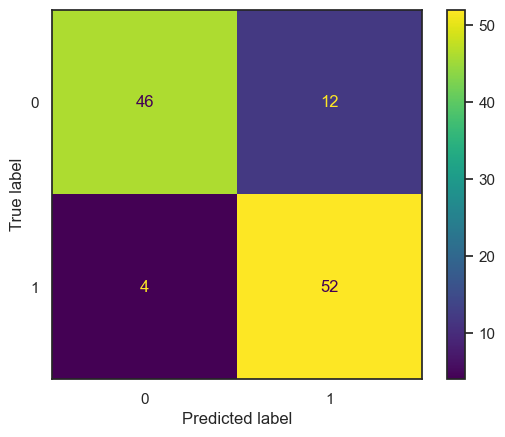

None
              precision    recall  f1-score   support

         HGG       0.92      0.79      0.85        58
         LGG       0.81      0.93      0.87        56

    accuracy                           0.86       114
   macro avg       0.87      0.86      0.86       114
weighted avg       0.87      0.86      0.86       114



In [84]:
dt4_clf = load('DT4.joblib')
y_pred4 = dt4_clf.predict(X_test4)

print(evaluate_classifier(y_pred4, y_test1))
print(classification_report(y_pred4, y_test1))

In [85]:
f1_score(y_test1,y_pred4, average="binary", pos_label="HGG")

0.851851851851852

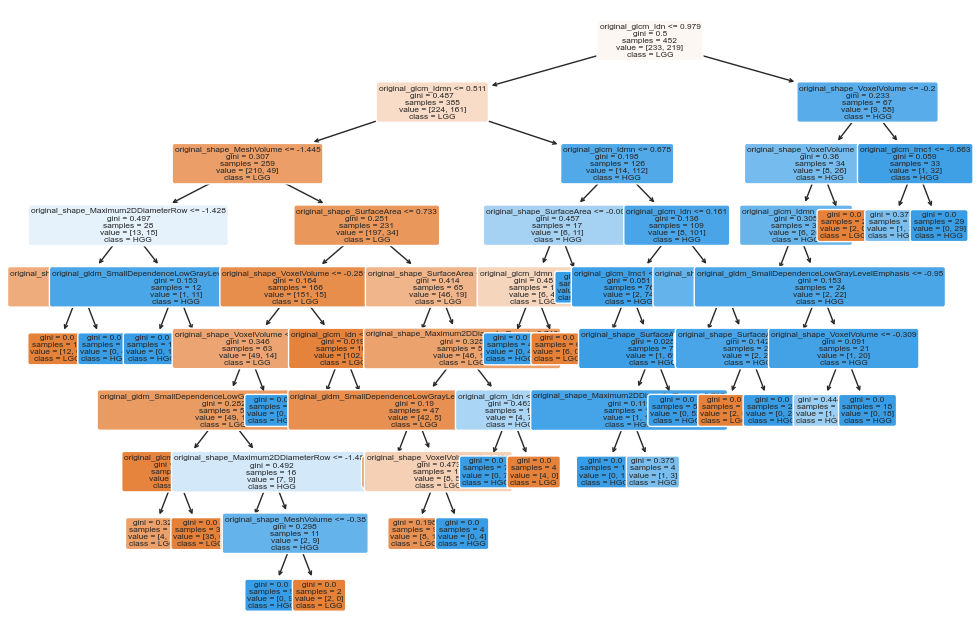

In [86]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt3_clf, filled=True, feature_names=X_train4.columns, class_names=['LGG', 'HGG'], rounded=True, fontsize=6)
plt.show()

In [87]:
from sklearn.tree import export_text
tree_model_dt4 = dt4_clf

tree_rules_dt4 = export_text(tree_model_dt4, feature_names=list(X_train4.columns))
print("Rules of Decision Tree (dt4_clf):\n", tree_rules_dt4)

Rules of Decision Tree (dt4_clf):
 |--- original_glcm_Idn <= 0.51
|   |--- original_glrlm_RunLengthNonUniformityNormalized <= 0.04
|   |   |--- original_shape_MinorAxisLength <= -0.15
|   |   |   |--- original_glcm_Imc1 <= 0.42
|   |   |   |   |--- original_shape_VoxelVolume <= -0.86
|   |   |   |   |   |--- original_gldm_SmallDependenceLowGrayLevelEmphasis <= 0.58
|   |   |   |   |   |   |--- class: LGG
|   |   |   |   |   |--- original_gldm_SmallDependenceLowGrayLevelEmphasis >  0.58
|   |   |   |   |   |   |--- class: LGG
|   |   |   |   |--- original_shape_VoxelVolume >  -0.86
|   |   |   |   |   |--- original_glcm_Imc1 <= -0.83
|   |   |   |   |   |   |--- class: LGG
|   |   |   |   |   |--- original_glcm_Imc1 >  -0.83
|   |   |   |   |   |   |--- class: HGG
|   |   |   |--- original_glcm_Imc1 >  0.42
|   |   |   |   |--- class: HGG
|   |   |--- original_shape_MinorAxisLength >  -0.15
|   |   |   |--- class: HGG
|   |--- original_glrlm_RunLengthNonUniformityNormalized >  0.04
|   

## 3.4 Explainable Boosting Machine classifier

In [88]:
#!pip install interpret

In [26]:
from interpret.glassbox import ExplainableBoostingClassifier

### A. With no preprocessing

In [ ]:
from sklearn.model_selection import GridSearchCV
eb_clf = ExplainableBoostingClassifier(random_state=42)
param_grid = {}
CV_ebc1 = GridSearchCV(estimator=eb_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_ebc1.fit(X_train1, y_train1.diagnostic)
print("Best Score:", CV_ebc1.best_score_)

In [91]:
#save the model to not run everything from scratch
dump(CV_ebc1, 'eb1.joblib')

['eb1.joblib']

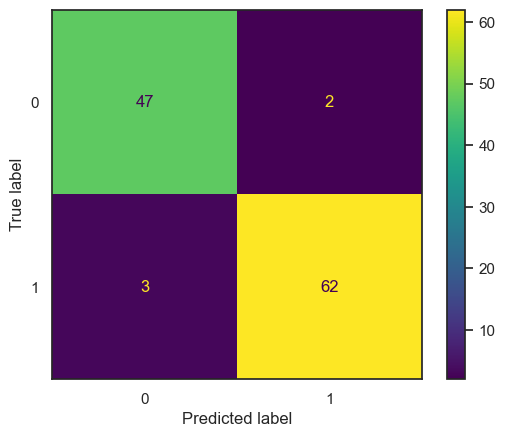

None
              precision    recall  f1-score   support

         HGG       0.94      0.96      0.95        49
         LGG       0.97      0.95      0.96        65

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [92]:
eb1 = load('eb1.joblib')
y_pred = eb1.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### B. Feature selection with PCA

In [93]:
from sklearn.model_selection import GridSearchCV
eb_clf = ExplainableBoostingClassifier(random_state=42)
param_grid = {}
CV_ebc2 = GridSearchCV(estimator=eb_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_ebc2.fit(X_train2, y_train1.diagnostic)
print("Best Score:", CV_ebc2.best_score_)

Best Score: 0.9241916729182295


In [94]:
#save the model to not run everything from scratch
dump(CV_ebc2, 'eb2.joblib')

['eb2.joblib']

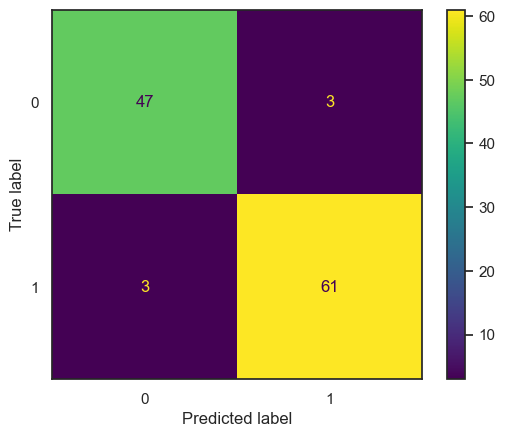

None
              precision    recall  f1-score   support

         HGG       0.94      0.94      0.94        50
         LGG       0.95      0.95      0.95        64

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [95]:
eb2 = load('eb2.joblib')
y_pred = eb2.predict(X_test2)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### C. Feature selection with Logistic Regression

In [28]:
from sklearn.model_selection import GridSearchCV
eb_clf = ExplainableBoostingClassifier(random_state=42)
param_grid = {}
CV_ebc3 = GridSearchCV(estimator=eb_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_ebc3.fit(X_train3, y_train1.diagnostic)
print("Best Score:", CV_ebc3.best_score_)

Best Score: 0.9266242055649903


In [29]:
#save the model to not run everything from scratch
dump(CV_ebc3, 'eb3.joblib')

['eb3.joblib']

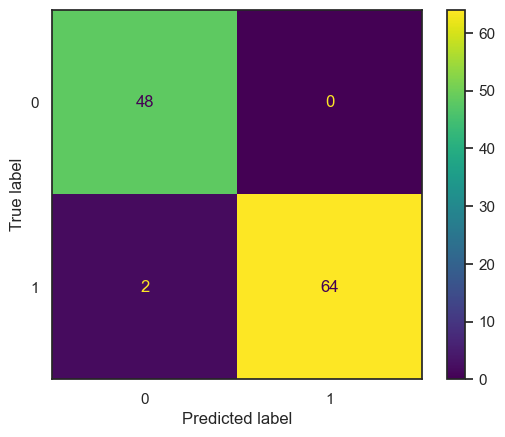

None
              precision    recall  f1-score   support

         HGG       0.96      1.00      0.98        48
         LGG       1.00      0.97      0.98        66

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [30]:
eb3 = load('eb3.joblib')
y_pred = eb3.predict(X_test3)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### D. Feature selection with Correlation

In [99]:
from sklearn.model_selection import GridSearchCV
eb_clf = ExplainableBoostingClassifier(random_state=42)
param_grid = {}
CV_ebc4 = GridSearchCV(estimator=eb_clf, param_grid=param_grid, cv=cv, scoring=scorer)
CV_ebc4.fit(X_train4, y_train1.diagnostic)
print("Best Score:", CV_ebc4.best_score_)

Best Score: 0.9326593261327506


In [100]:
#save the model to not run everything from scratch
dump(CV_ebc4, 'eb4.joblib')

['eb4.joblib']

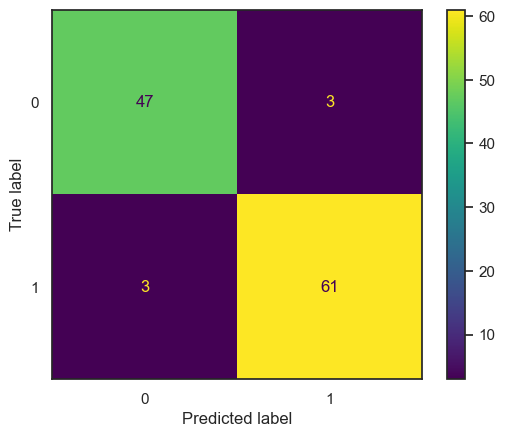

None
              precision    recall  f1-score   support

         HGG       0.94      0.94      0.94        50
         LGG       0.95      0.95      0.95        64

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [101]:
eb4 = load('eb4.joblib')
y_pred = eb4.predict(X_test4)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

## BEST MODEL
It's important to highlight that th

In [102]:
from sklearn.metrics import f1_score, accuracy_score
from joblib import load

def best_model(model, X_test, y_test, num_runs=5):
    model = load(model)
    f1_scores = []
    accuracies = []
    
    for i in range(num_runs):
        y_pred = model.predict(X_test)
        
        f1 = f1_score(y_test, y_pred, average='macro')
        f1_scores.append(f1)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    mean_f1_score = sum(f1_scores) / len(f1_scores)
    mean_accuracy = sum(accuracies) / len(accuracies)
    
    print(f"Model: {model}  --> F1-Score: {round(mean_f1_score,2)} | Accuracy: {round(mean_accuracy,2)}")

In [104]:
models = [(X_test1, 'RF1.joblib'), (X_test2, 'RF2.joblib'), (X_test3, 'RF3.joblib'), (X_test4, 'RF4.joblib'),
          (X_test1, 'LR1.joblib'), (X_test2, 'LR2.joblib'), (X_test3, 'LR3.joblib'), (X_test4, 'LR4.joblib'),
          (X_test1, 'DT1.joblib'), (X_test2, 'DT2.joblib'), (X_test3, 'DT3.joblib'), (X_test4, 'DT4.joblib'),
          (X_test1, 'eb1.joblib'), (X_test2, 'eb2.joblib'), (X_test3, 'eb3.joblib'), (X_test4, 'eb4.joblib')]

for dataset, model in models:
    best_model(model, dataset, y_test1, 10)

Model: RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       random_state=42)  --> F1-Score: 0.94 | Accuracy: 0.94
Model: RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       random_state=42)  --> F1-Score: 0.95 | Accuracy: 0.95
Model: RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)  --> F1-Score: 0.96 | Accuracy: 0.96
Model: RandomForestClassifier(criterion='entropy', max_depth=9, random_state=42)  --> F1-Score: 0.96 | Accuracy: 0.96
Model: LogisticRegression(C=30, multi_class='multinomial', random_state=42,
                   solver='newton-cg')  --> F1-Score: 0.95 | Accuracy: 0.95
Model: LogisticRegression(C=0.5, random_state=42, solver='saga')  --> F1-Score: 0.78 | Accuracy: 0.78
Model: LogisticRegression(C=20, multi_class='multinomial', random_state=42)  --> F1-Score: 0.82 | Accuracy: 0.82
Model: LogisticRegression(C=130,

### Obtaining information from the best model

In [105]:
print(X_test3.columns)

Index(['original_firstorder_Skewness', 'original_glcm_Idn',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis',
       'original_glrlm_RunPercentage', 'original_glszm_GrayLevelVariance',
       'original_shape_MajorAxisLength', 'original_shape_MinorAxisLength',
       'original_shape_SurfaceVolumeRatio'],
      dtype='object')


In [106]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
set_visualize_provider(InlineProvider())

best_estimator = CV_ebc3.best_estimator_
explanation = best_estimator.explain_global()

show(explanation)